<a href="https://colab.research.google.com/github/SanStart/CNN-Model/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [ ]:
#Defining hyperparameters
epochs = 50
batch_size = 200
learning_rate = 0.001

In [ ]:
#Defining the transforms
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((90.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#Loading CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

#Splitting dataset into train and validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#Defining CNN Model
class CIFAR10_CNN(nn.Module):
  def __init__(self):
    super(CIFAR10_CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=24, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.fc1 = nn.Linear(24*8*8, 1800)
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(1800, 2000)
    self.relu4 = nn.ReLU()
    self.fc3 = nn.Linear(2000, 10)

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.pool1(out)
    out = self.conv2(out)
    out = self.relu2(out)
    out = self.pool2(out)
    out = out.view(-1, 24*8*8)
    out = self.fc1(out)
    out = self.relu3(out)
    out = self.fc2(out)
    out = self.relu4(out)
    out = self.fc3(out)

    return out






In [ ]:
model = CIFAR10_CNN()   #Model initialization
model

criterion = nn.CrossEntropyLoss()     #Loss function for multiple classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)    #Optimizer

### Model Training

In [ ]:
#def train(model, train_loader, val_loader, criterion, optimizer, epochs):
training_loss = []
training_acc = []
validation_loss =[]
validation_acc =[]

for epoch in range(epochs):
  total = 0.0
  train_loss = 0.0
  train_acc = 0.0
  train_accuracy = 0.0
  for data in train_loader:
    #Getting the inputs
    inputs, labels = data

    #Clearing the parameter gradients
    optimizer.zero_grad()

    #Forward Pass
    output = model(inputs)

    #Calculating the loss
    loss = criterion(output, labels)

    #Claculating Gradients
    loss.backward()

    #Updating weights
    optimizer.step()

    _, pred = torch.max(output, 1)
    total += labels.size(0)
    #Calculating loss
    train_loss += loss.item()
    train_acc += (pred == labels).sum().item()
    #training_tracker[0].append(train_loss)


  train_loss /= len(train_loader)
  training_loss.append(train_loss)
  ## TODO -- track training accuracy
  train_accuracy = (100 * train_acc/total)
  training_acc.append(train_accuracy)
  #print('Training Loss: {:.3f}'.format(train_loss))


  model.eval()
  val_loss = 0.0
  val_acc = 0.0
  total = 0.0
  val_accuracy = 0.0
  for data in val_loader:
    inputs, labels = data
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output, labels)

    val_loss += loss.item()
    _, pred = torch.max(output, 1)
    total += labels.size(0)
    val_acc += (pred == labels).sum().item()


  val_loss /= len(val_loader)
  val_accuracy = (100 * val_acc/total)
  validation_loss.append(val_loss)
  validation_acc.append(val_accuracy)

  print('Epoch: {}/{}, Train Loss: {:.3f}, Train Accuracy: {:.3f}, Val Loss: {:.3f}, Val Accuracy: {:.3f}'.format(epoch+1, epochs, train_loss, train_accuracy, val_loss, val_accuracy))

torch.save(model.state_dict(), 'cifar10_CNN.pt')

Epoch: 1/50, Train Loss: 1.628, Train Accuracy: 39.758, Val Loss: 1.461, Val Accuracy: 46.840
Epoch: 2/50, Train Loss: 1.334, Train Accuracy: 51.158, Val Loss: 1.302, Val Accuracy: 50.920
Epoch: 3/50, Train Loss: 1.208, Train Accuracy: 56.144, Val Loss: 1.201, Val Accuracy: 57.220
Epoch: 4/50, Train Loss: 1.107, Train Accuracy: 60.142, Val Loss: 1.089, Val Accuracy: 60.580
Epoch: 5/50, Train Loss: 1.043, Train Accuracy: 62.644, Val Loss: 1.046, Val Accuracy: 62.960
Epoch: 6/50, Train Loss: 0.976, Train Accuracy: 65.164, Val Loss: 1.012, Val Accuracy: 63.260
Epoch: 7/50, Train Loss: 0.927, Train Accuracy: 66.993, Val Loss: 0.970, Val Accuracy: 65.300
Epoch: 8/50, Train Loss: 0.877, Train Accuracy: 68.813, Val Loss: 0.929, Val Accuracy: 67.060
Epoch: 9/50, Train Loss: 0.843, Train Accuracy: 69.764, Val Loss: 0.878, Val Accuracy: 69.140
Epoch: 10/50, Train Loss: 0.805, Train Accuracy: 71.496, Val Loss: 0.865, Val Accuracy: 69.540
Epoch: 11/50, Train Loss: 0.775, Train Accuracy: 72.649, Va

In [ ]:
training_loss

[1.0550313374731275, 0.9878901288244459]

In [ ]:
#print(data.shape)

torch.Size([120, 3, 32, 32])


In [ ]:
'''model.eval()
#test_loss = 0.0
test_acc = 0.0
total = 0.0
#with torch.no_grad():
for data in test_loader:
  inputs, labels = data
  labels = labels.to(torch.float32)
  output = model(inputs)
  #loss = criterion(output, labels)

  #test_loss += loss.item()
  _, pred = torch.max(output, 1)
  total += labels.size(0)
  test_acc += (pred == labels).sum().item()


#accuracy
test_accuracy = (100 * test_acc/total)
print('Test Accuracy: {:.3f}'.format(test_accuracy))
  '''


Test Accuracy: 10.000


In [ ]:
print(epochs)

5


In [ ]:
training_tracker[0]

[1.029945191277398, 1.029945191277398]

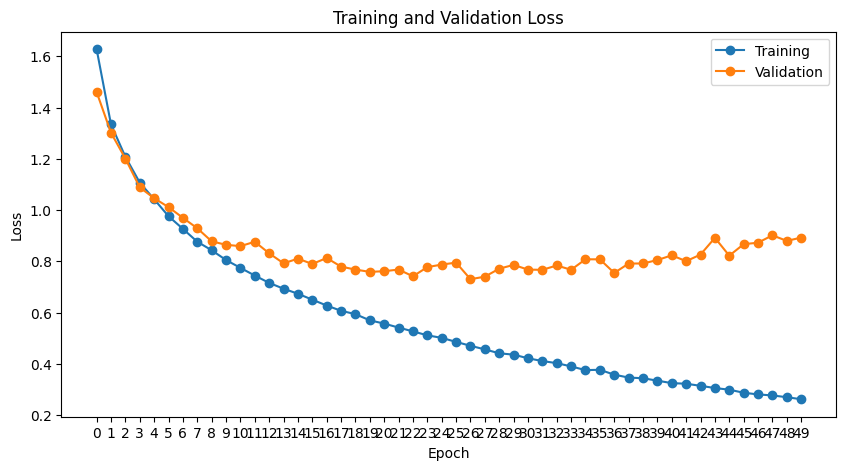

In [ ]:
#Plotting Accuracies
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(training_loss, marker='o')
plt.plot(validation_loss, marker='o')
plt.xticks(range(epochs))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

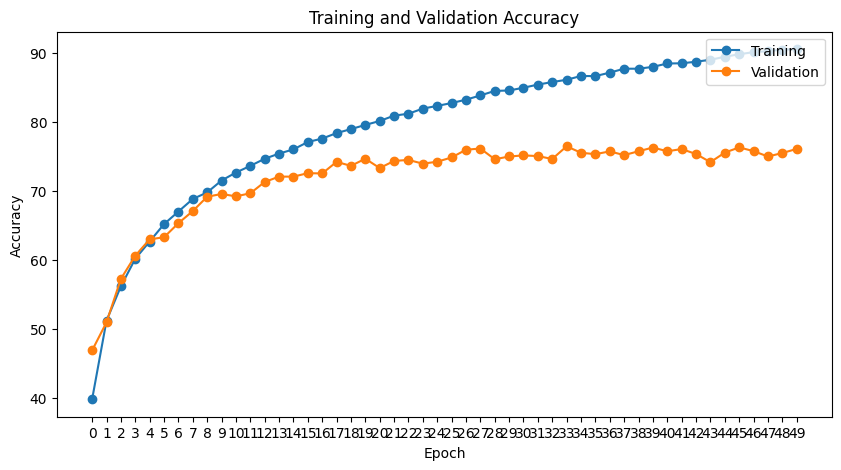

In [ ]:
#Plotting Accuracies
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.plot(training_acc, marker='o')
plt.plot(validation_acc, marker='o')
plt.xticks(range(epochs))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()